In [11]:
import pylab as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [12]:
fragment_file = '../input/Beer_3_T10_POS_fragments.csv'

<p>Load the fragments and swap the NaNs with zeros</p>

In [25]:
input_data = pd.DataFrame.from_csv(fragment_file)
input_data = input_data.fillna(0.0)

<p>Convert to a NUMPY array</p>

In [26]:
input_matrix = np.array(input_data)

<p>Compute the cosine similarity. Note that this is the same as the normalised dot product</p>
<p>For a parent ion $ \mathbf{x}_i $ and another $ \mathbf{x}_j $ , the cosine similarity is the cosine of the angle between the two vectors, which is computed as:</p>

$$ c_{ij} = \frac{\mathbf{x}_i^T\mathbf{x}_j}{\sqrt{||\mathbf{x}_i||} \sqrt{||\mathbf{x}_j||}} $$

<p>If we normalise the vectors first to have length one, then it is just the dot product.</p>
<p>Normalise the vectors</p>

In [36]:
l = (input_matrix**2).sum(axis=0)
normalised_input_matrix = np.divide(input_matrix,np.sqrt(l))

In [43]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
Z = pdist(normalised_input_matrix.transpose(),metric='cosine')

<p>Do some hierarchical clustering -- note the parameter 1.0, should play with this</p>

In [45]:
a = hierarchy.fcluster(hierarchy.average(Z),1.0)

In [177]:
import networkx as nx
n_features,n_parents = normalised_input_matrix.shape
n_clusters = a.max()
G = nx.Graph()
cluster_nodes = []
plot_clusters = [1,2,3,4,5,6,7,8,9,10]
labels = {}
for i in plot_clusters:
    if i in plot_clusters:
        G.add_node(i,type='cluster')
        labels[i] = i


parents = []
for i in np.arange(n_parents):
    if a[i] in plot_clusters:
        parents.append(i+1+np.array(plot_clusters).max())
        G.add_node(parents[-1],type='parent')
        G.add_edge(parents[-1],a[i])
        labels[parents[-1]] = i

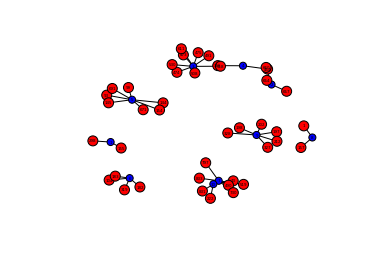

In [179]:
pos = nx.spring_layout(G,k=0.3)
nx.draw_networkx_nodes(G,pos,nodelist = plot_clusters,node_color='b',node_size = 50)
nx.draw_networkx_nodes(G,pos,nodelist = parents,node_color = 'r',node_size = 100)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos,labels,font_size=4)
plt.axis('off')
plt.savefig("labels_and_colors.pdf") 

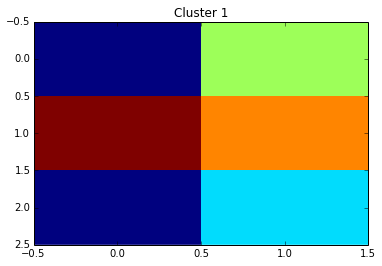

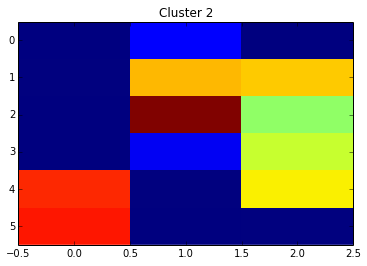

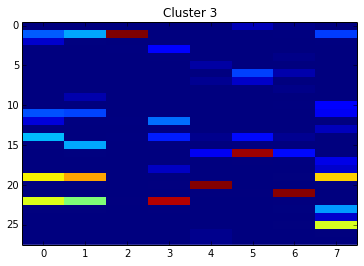

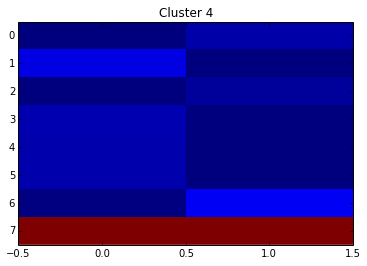

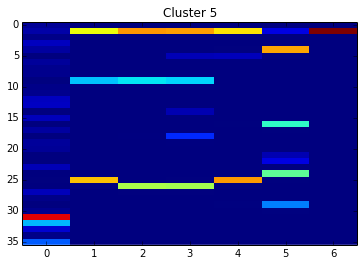

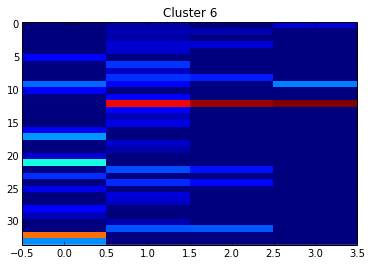

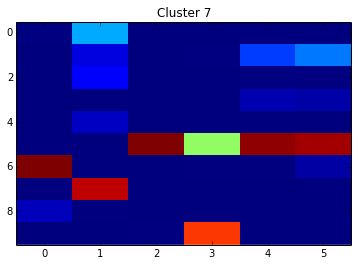

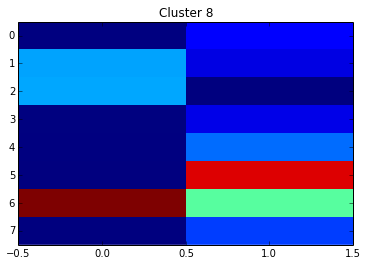

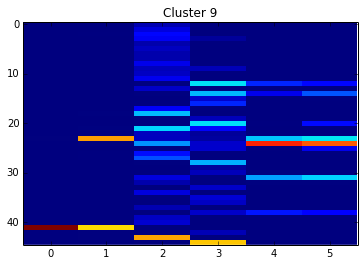

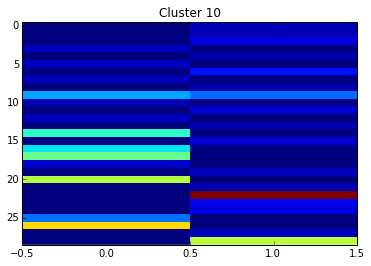

In [155]:
for cluster_no in plot_clusters:
    parent_pos = np.where(a==cluster_no)[0]
    sub_mar = normalised_input_matrix[:,parent_pos]
    s = sub_mar.sum(axis=1)
    spos = np.where(s>0)[0]
    sub_mar = sub_mar[spos,:]
    plt.figure()
    plt.imshow(sub_mar,aspect = 'auto',interpolation = 'none')
    plt.title('Cluster {}'.format(cluster_no))